## Porównanie wyników z poprzednimi wyborami prezydenckimi (2025 vs 2020 vs 2015)

Chcąc pokazać, że zastosowane metody wydają się niepoprawne, porównajmy wyniki z danymi z poprzednich lat

[Liczba komisji wyborczych się zmienia](https://demagog.org.pl/wypowiedzi/protesty-wyborcze-czy-wzrost-liczby-komisji-ma-znaczenie/) (zwiększa), dlatego wyniki zostały znormalizowane

In [1]:
komisje_2025_total = 26805
komisje_2020_total = 26215
komisje_2015_total = 30553
komisje_2025_losowo_total = 31627

In [48]:
import pandas as pd

# Dane surowe
data = [
    {"Rok": 2015, "Kandydat": "Duda",         "≥1": 7124, "≥2": 842,  "≥3": 71, "≥4": 1, "łączna liczba komisji": komisje_2025_total},
    {"Rok": 2015, "Kandydat": "Komorowski",   "≥1": 7073, "≥2": 756,  "≥3": 30, "≥4": 0, "łączna liczba komisji": komisje_2025_total},
    {"Rok": 2020, "Kandydat": "Duda",         "≥1": 6243, "≥2": 571,  "≥3": 47, "≥4": 0, "łączna liczba komisji": komisje_2020_total},
    {"Rok": 2020, "Kandydat": "Trzaskowski",  "≥1": 8406, "≥2": 962,  "≥3": 24, "≥4": 2, "łączna liczba komisji": komisje_2020_total},
    {"Rok": 2025, "Kandydat": "Nawrocki",     "≥1": 8108, "≥2": 695,  "≥3": 43, "≥4": 2, "łączna liczba komisji": komisje_2015_total},
    {"Rok": 2025, "Kandydat": "Trzaskowski",  "≥1": 9487, "≥2": 1288, "≥3": 45, "≥4": 3, "łączna liczba komisji": komisje_2015_total},


    # Losowe grupowanie (31627 komisji)
    {"Rok": 2025, "Kandydat": "Nawrocki - losowo",    "≥1": 8910,  "≥2": 759,  "≥3": 21,  "≥4": 1, "łączna liczba komisji": komisje_2025_losowo_total},
    {"Rok": 2025, "Kandydat": "Trzaskowski - losowo", "≥1": 14642, "≥2": 5009, "≥3": 105, "≥4": 0, "łączna liczba komisji": komisje_2025_losowo_total},
]

df = pd.DataFrame(data)

Liczba komisji, w których wystąpiło ≥N anomalii (np minimum jedna, albo wszystkie cztery)

In [49]:
df

,Rok,Kandydat,≥1,≥2,≥3,≥4,łączna liczba komisji
0,2015,Duda,7124,842,71,1,26805
1,2015,Komorowski,7073,756,30,0,26805
2,2020,Duda,6243,571,47,0,26215
3,2020,Trzaskowski,8406,962,24,2,26215
4,2025,Nawrocki,8108,695,43,2,30553
5,2025,Trzaskowski,9487,1288,45,3,30553
6,2025,Nawrocki - losowo,8910,759,21,1,31627
7,2025,Trzaskowski - losowo,14642,5009,105,0,31627


Znormalizowane - w stosunku do ogólnej liczby komisji

In [50]:
# Dodaj kolumny procentowe
for col in ["≥1", "≥2", "≥3", "≥4"]:
    df[f"{col} (%)"] = round(100 * df[col] / df["łączna liczba komisji"], 2)

# Dla "≥4" zwiększamy precyzję do 4 miejsc
df["≥4 (%)"] = round(100 * df["≥4"] / df["łączna liczba komisji"], 4)

# Wybierz tylko kolumny Rok, Kandydat i procenty
percent_cols = ["Rok", "Kandydat", "≥1 (%)", "≥2 (%)", "≥3 (%)", "≥4 (%)"]
df[percent_cols]

,Rok,Kandydat,≥1 (%),≥2 (%),≥3 (%),≥4 (%)
0,2015,Duda,26.58,3.14,0.26,0.0037
1,2015,Komorowski,26.39,2.82,0.11,0.0000
2,2020,Duda,23.81,2.18,0.18,0.0000
3,2020,Trzaskowski,32.07,3.67,0.09,0.0076
4,2025,Nawrocki,26.54,2.27,0.14,0.0065
5,2025,Trzaskowski,31.05,4.22,0.15,0.0098
6,2025,Nawrocki - losowo,28.17,2.40,0.07,0.0032
7,2025,Trzaskowski - losowo,46.30,15.84,0.33,0.0000


Wykresy

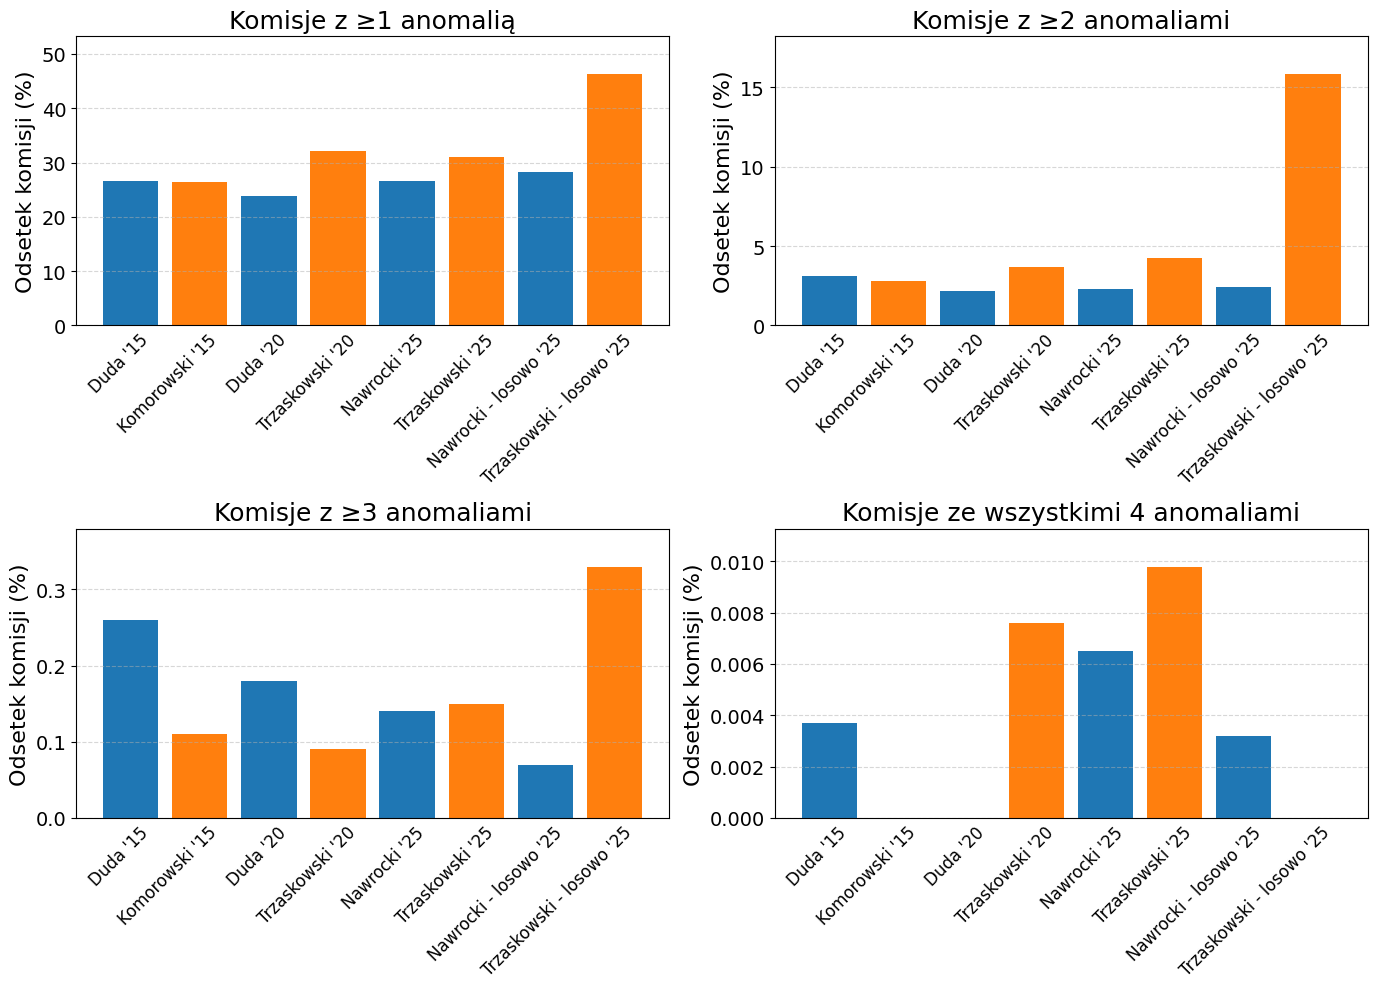

In [51]:
import matplotlib.pyplot as plt

# Przygotowanie kolumn do wykresów
percent_cols = {
    "≥1 (%)": "Komisje z ≥1 anomalią",
    "≥2 (%)": "Komisje z ≥2 anomaliami",
    "≥3 (%)": "Komisje z ≥3 anomaliami",
    "≥4 (%)": "Komisje ze wszystkimi 4 anomaliami"
}

# Tworzenie etykiety kandydata z rokiem np. "Trzaskowski'25"
df["Etykieta"] = df["Kandydat"] + " '" + df["Rok"].astype(str).str[-2:]

# Posortuj etykiety po roku, żeby były logicznie
sorted_df = df.sort_values("Rok")

# Przygotowanie siatki wykresów (2x2)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Tworzenie wykresów na jednej planszy z naprzemiennymi kolorami słupków
for ax, (col, title) in zip(axes, percent_cols.items()):
    # Naprzemienne kolory: co drugi słupek pomarańczowy
    bar_colors = ["tab:orange" if i % 2 else "tab:blue" for i in range(len(sorted_df))]
    
    ax.bar(sorted_df["Etykieta"], sorted_df[col], color=bar_colors)
    ax.set_title(title, fontsize=18)
    ax.set_ylabel("Odsetek komisji (%)", fontsize=16)

    # Przesunięcie etykiet w prawo o 0.3 (możesz dostroić tę wartość)
    tick_positions = [i + 0.3 for i in range(len(sorted_df))]

    ax.tick_params(axis='y', labelsize=14)

    ax.set_xticks(tick_positions)
    ax.set_xticklabels(sorted_df["Etykieta"], rotation=45, ha='right', fontsize=12)

    # Ukrycie tick marków (ząbków)
    ax.tick_params(axis='x', which='both', length=0)

    ax.set_xticklabels(sorted_df["Etykieta"], rotation=45, ha='right', fontsize=12)
    ax.set_ylim(0, sorted_df[col].max() * 1.15)
    ax.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

### komentarz

wyniki te nie wyglądają na odstające od lat poprzednich. Jedynie komisje, gdzie zanotowano wszystkie 4 anomalie powinny budzić pewien "niepokój", natomiast mówimy tutaj o 1-4 takich komisjach...

### W rozbiciu na poszczególne anomalie

### pop_outlier

In [14]:
pop_outlier_df = pd.DataFrame([
    {"Rok": 2015, "Kandydat": "Komorowski", "Komisje z anomalią": 3206, "Łączna liczba komisji": komisje_2025_total},
    {"Rok": 2015, "Kandydat": "Duda",       "Komisje z anomalią": 2928, "Łączna liczba komisji": komisje_2025_total},
    {"Rok": 2020, "Kandydat": "Trzaskowski","Komisje z anomalią": 3430, "Łączna liczba komisji": komisje_2020_total},
    {"Rok": 2020, "Kandydat": "Duda",       "Komisje z anomalią": 2893, "Łączna liczba komisji": komisje_2020_total},
    {"Rok": 2025, "Kandydat": "Trzaskowski","Komisje z anomalią": 4551, "Łączna liczba komisji": komisje_2015_total},
    {"Rok": 2025, "Kandydat": "Nawrocki",   "Komisje z anomalią": 3750, "Łączna liczba komisji": komisje_2015_total},
    # losowe
    {"Rok": 2025, "Kandydat": "Nawrocki - losowo", "Komisje z anomalią": 3771, "Łączna liczba komisji": komisje_2025_losowo_total},
    {"Rok": 2025, "Kandydat": "Trzaskowski - losowo", "Komisje z anomalią": 6234, "Łączna liczba komisji": komisje_2025_losowo_total},
])

pop_outlier_df["Odsetek (%)"] = round(
    100 * pop_outlier_df["Komisje z anomalią"] / pop_outlier_df["Łączna liczba komisji"],
    2
)

pop_outlier_df

,Rok,Kandydat,Komisje z anomalią,Łączna liczba komisji,Odsetek (%)
0,2015,Komorowski,3206,26805,11.96
1,2015,Duda,2928,26805,10.92
2,2020,Trzaskowski,3430,26215,13.08
3,2020,Duda,2893,26215,11.04
4,2025,Trzaskowski,4551,30553,14.90
5,2025,Nawrocki,3750,30553,12.27
6,2025,Nawrocki - losowo,3771,31627,11.92
7,2025,Trzaskowski - losowo,6234,31627,19.71


### growth_outlier

In [16]:
growth_outlier_df = pd.DataFrame([
    {"Rok": 2015, "Kandydat": "Komorowski", "Liczba komisji": 2754},
    {"Rok": 2015, "Kandydat": "Duda",       "Liczba komisji": 3074},
    {"Rok": 2020, "Kandydat": "Trzaskowski","Liczba komisji": 3795},
    {"Rok": 2020, "Kandydat": "Duda",       "Liczba komisji": 1863},
    {"Rok": 2025, "Kandydat": "Trzaskowski","Liczba komisji": 3552},
    {"Rok": 2025, "Kandydat": "Nawrocki",   "Liczba komisji": 3127},
    {"Rok": 2025, "Kandydat": "Nawrocki - losowo", "Liczba komisji": 3313},
    {"Rok": 2025, "Kandydat": "Trzaskowski - losowo", "Liczba komisji": 4119},

])

# Zmiana nazwy kolumny
growth_outlier_df = growth_outlier_df.rename(columns={"Liczba komisji": "Komisje z anomalią"})

# Dodanie łącznej liczby komisji
growth_outlier_df["Łączna liczba komisji"] = [
    komisje_2015_total, komisje_2015_total,
    komisje_2020_total, komisje_2020_total,
    komisje_2025_total, komisje_2025_total,
    komisje_2025_losowo_total, komisje_2025_losowo_total
]

# Obliczenie odsetka
growth_outlier_df["Odsetek (%)"] = round(
    100 * growth_outlier_df["Komisje z anomalią"] / growth_outlier_df["Łączna liczba komisji"],
    2
)

growth_outlier_df

,Rok,Kandydat,Komisje z anomalią,Łączna liczba komisji,Odsetek (%)
0,2015,Komorowski,2754,30553,9.01
1,2015,Duda,3074,30553,10.06
2,2020,Trzaskowski,3795,26215,14.48
3,2020,Duda,1863,26215,7.11
4,2025,Trzaskowski,3552,26805,13.25
5,2025,Nawrocki,3127,26805,11.67
6,2025,Nawrocki - losowo,3313,31627,10.48
7,2025,Trzaskowski - losowo,4119,31627,13.02


### flip

In [17]:
flip_df = pd.DataFrame([
    {"Rok": 2015, "Kandydat": "Komorowski", "Liczba komisji": 1806},
    {"Rok": 2015, "Kandydat": "Duda",       "Liczba komisji": 1750},
    {"Rok": 2020, "Kandydat": "Trzaskowski","Liczba komisji": 1885},
    {"Rok": 2020, "Kandydat": "Duda",       "Liczba komisji": 1999},
    {"Rok": 2025, "Kandydat": "Trzaskowski","Liczba komisji": 2608},
    {"Rok": 2025, "Kandydat": "Nawrocki",   "Liczba komisji": 1843},
    {"Rok": 2025, "Kandydat": "Nawrocki - losowo", "Liczba komisji": 2479},
    {"Rok": 2025, "Kandydat": "Trzaskowski - losowo", "Liczba komisji": 9290},

])

# Zmiana nazwy kolumny
flip_df = flip_df.rename(columns={"Liczba komisji": "Komisje z anomalią"})

# Dodanie łącznej liczby komisji
flip_df["Łączna liczba komisji"] = [
    komisje_2015_total, komisje_2015_total,
    komisje_2020_total, komisje_2020_total,
    komisje_2025_total, komisje_2025_total,
    komisje_2025_losowo_total, komisje_2025_losowo_total
]

# Obliczenie odsetka
flip_df["Odsetek (%)"] = round(
    100 * flip_df["Komisje z anomalią"] / flip_df["Łączna liczba komisji"],
    2
)

# Sortowanie
flip_df

,Rok,Kandydat,Komisje z anomalią,Łączna liczba komisji,Odsetek (%)
0,2015,Komorowski,1806,30553,5.91
1,2015,Duda,1750,30553,5.73
2,2020,Trzaskowski,1885,26215,7.19
3,2020,Duda,1999,26215,7.63
4,2025,Trzaskowski,2608,26805,9.73
5,2025,Nawrocki,1843,26805,6.88
6,2025,Nawrocki - losowo,2479,31627,7.84
7,2025,Trzaskowski - losowo,9290,31627,29.37


### more_votes

In [26]:
more_votes_df = pd.DataFrame([
    {"Rok": 2015, "Kandydat": "Komorowski", "Liczba komisji": 93},
    {"Rok": 2015, "Kandydat": "Duda",       "Liczba komisji": 286},
    {"Rok": 2020, "Kandydat": "Trzaskowski","Liczba komisji": 284},
    {"Rok": 2020, "Kandydat": "Duda",       "Liczba komisji": 106},
    {"Rok": 2025, "Kandydat": "Trzaskowski","Liczba komisji": 112},
    {"Rok": 2025, "Kandydat": "Nawrocki",   "Liczba komisji": 128},
])

# Zmiana nazwy kolumny
more_votes_df = more_votes_df.rename(columns={"Liczba komisji": "Komisje z anomalią"})

# Dodanie łącznej liczby komisji
more_votes_df["Łączna liczba komisji"] = [
    komisje_2015_total, komisje_2015_total, komisje_2020_total, komisje_2020_total, komisje_2025_total, komisje_2025_total
]

# Obliczenie odsetka
more_votes_df["Odsetek (%)"] = round(
    100 * more_votes_df["Komisje z anomalią"] / more_votes_df["Łączna liczba komisji"],
    2
)

more_votes_df

,Rok,Kandydat,Komisje z anomalią,Łączna liczba komisji,Odsetek (%)
0,2015,Komorowski,93,30553,0.30
1,2015,Duda,286,30553,0.94
2,2020,Trzaskowski,284,26215,1.08
3,2020,Duda,106,26215,0.40
4,2025,Trzaskowski,112,26805,0.42
5,2025,Nawrocki,128,26805,0.48
